## 一、读取数据

导入所需库,以及做分析所需要的原始数据

In [1]:
#导入所需库
import numpy as np
import pandas as pd

In [2]:
#导入所需数据
original_data = pd.read_csv("双十一淘宝美妆数据.csv")

## 二、评估和清洗数据

在这一部分中，我们将对在上一部分建立的`data`的DataFrame所包含的数据进行评估和清理。

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

为了区分开经过清理的数据和原始的数据，我们创建新的变量`cleaned_data`，让它为`original_data`复制出的副本.之后的清理步骤都将被运用在`cleaned_data`上。

In [3]:
#复制出一个副本，后续操作基于cleaned_data
cleaned_data = original_data.copy()

### 2.1 评估数据

#### 2.1.1 数据整齐度

In [4]:
#查看前10行了解大致信息
cleaned_data.head(10)

,update_time,id,title,price,sale_count,comment_count,店名
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂
2,2016/11/14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂
3,2016/11/14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂
4,2016/11/14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂
5,2016/11/14,A18178129035,自然堂 雪域纯粹滋润洗颜霜 110g 补水保湿 洗面奶女 深层清洁,88.0,42858.0,8426.0,自然堂
6,2016/11/14,A18178206572,CHANDO/自然堂雪润皙白晶采霜（滋润型）50g 滋润修护面霜 正品,139.0,3027.0,304.0,自然堂
7,2016/11/14,A18190290933,自然堂 活泉深层净化控油凝露60g 控油补水保湿滋润 活泉精华正品,86.0,6925.0,740.0,自然堂
8,2016/11/14,A18250630014,CHANDO/自然堂 凝时鲜颜肌活修护精华液35ml 淡化细纹护肤精华,216.0,4649.0,630.0,自然堂
9,2016/11/14,A18422797881,CHANDO/自然堂活泉保湿精华套装 保湿补水滋润控油面部护理套装,258.0,2293.0,43.0,自然堂


从头部的10行数据来看，`cleaned_data`数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

#### 2.1.2 数据干净度

In [5]:
#通过info，对数据内容进行大致了解。
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27598 entries, 0 to 27597
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   update_time    27598 non-null  object 
 1   id             27598 non-null  object 
 2   title          27598 non-null  object 
 3   price          27598 non-null  float64
 4   sale_count     25244 non-null  float64
 5   comment_count  25244 non-null  float64
 6   店名             27598 non-null  object 
dtypes: float64(3), object(4)
memory usage: 1.5+ MB


从输出结果来看，`cleaned_data`数据共有27598条观察值。`sale_count`、`comment_count`变量均存在缺失值，将在后续进行评估和清理。

此外，`update_time`表示统计时间，数据类型不应为数字，应为日期，所以需要进行数据格式转换。

In [6]:
# 将 update_time 列转换为 datetime 类型
cleaned_data['update_time'] = pd.to_datetime(cleaned_data['update_time'])

### 2.2 清洗数据

#### 2.2.1 处理缺失值

In [7]:
#查询sale_count这一列为的缺失值
cleaned_data.query("sale_count.isnull()")

,update_time,id,title,price,sale_count,comment_count,店名
2011,2016-11-14,A527960599636,Shu uemura植村秀新无色限唇膏 口红 长效保湿滋润 显色持久 正品,215.0,NaN,NaN,植村秀
2012,2016-11-14,A528013549083,Shu uemura植村秀晶萃溢彩肌底液30ml 面部精华,590.0,NaN,NaN,植村秀
2013,2016-11-14,A528030330786,Shu uemura 植村秀无色限柔雾唇膏 哑光口红 保湿持久 高饱和显色,215.0,NaN,NaN,植村秀
2014,2016-11-14,A528091449317,shu uemura植村秀无色限唇颊缤纷霜 腮红 口红两用 唇彩 正品,220.0,NaN,NaN,植村秀
2015,2016-11-14,A528191935022,Shu uemura植村秀韵眉膏 染眉膏 多维度丰眉刷头,280.0,NaN,NaN,植村秀
...,...,...,...,...,...,...,...
27593,2016-11-05,A535642405757,SK-II【11-11】全新大眼眼霜skii放大双眼眼部修护精华紧致,590.0,NaN,NaN,SKII
27594,2016-11-05,A535911851408,SK-II 11-11预售skii大眼眼霜sk2眼部修护精华霜淡化黑眼圈,590.0,NaN,NaN,SKII
27595,2016-11-05,A537027211850,SK-II 11-11预售skii前男友护肤面膜sk2精华面膜贴密集修护,1740.0,NaN,NaN,SKII
27596,2016-11-05,A538212160126,SK-II 11-11预售skiisk2神仙水护肤精华油面部套装滋润补水密集修,1190.0,NaN,NaN,SKII


查看完后发现，植村秀和SKII的sale_count和comment_count是缺失的。但是由于其他信息是全的，存在一定分析价值，故不能直接删除，于是以众数作为填充

In [8]:
# 查看sale_count列的众数并打印输出
mode_sale_count = cleaned_data.sale_count.mode()
print(mode_sale_count)

# 查看comment_count列的众数并打印输出
mode_comment_count = cleaned_data.comment_count.mode()
print(mode_comment_count)

0    0.0
Name: sale_count, dtype: float64
0    0.0
Name: comment_count, dtype: float64


此处两列的众数均为0，且由标签数据含义可知销售量和评论数有可能存在为0的情况，因此决定使用0来填充缺失值

In [9]:
# 填充缺失值
cleaned_data = cleaned_data.fillna(0)
# 对空值行数求和，查看是否还有空值
cleaned_data.isnull().sum()

update_time      0
id               0
title            0
price            0
sale_count       0
comment_count    0
店名               0
dtype: int64

#### 2.2.2 处理重复数据

In [10]:
#查看重复数据有几行
cleaned_data.duplicated().sum()

np.int64(86)

In [11]:
#删除重复行，并且重置索引
cleaned_data = cleaned_data.drop_duplicates().reset_index(drop=True)

#### 2.2.3 处理不一致数据

In [12]:
#针对cleaned_data，不一致数据可能存在于店名变量中，查看是否存在多个不同值指代同一店铺的情况
cleaned_data['店名'].value_counts()

店名
悦诗风吟    3021
佰草集     2264
欧莱雅     1942
雅诗兰黛    1810
倩碧      1703
美加净     1678
欧珀莱     1359
相宜本草    1313
妮维雅     1299
兰蔻      1285
娇兰      1193
自然堂     1175
玉兰油     1131
兰芝      1088
美宝莲      825
资生堂      821
植村秀      750
薇姿       746
雅漾       663
雪花秀      543
SKII     469
蜜丝佛陀     434
Name: count, dtype: int64

从输出结果可知，`店名`列里并不存在不一致数据，各个值都在指代不同的品牌。

#### 2.2.4 处理无效或错误数据

In [13]:
#通过dataframe的describe方法对数值统计信息进行快速了解。
original_data.describe()

,price,sale_count,comment_count
count,27598.00000,2.524400e+04,25244.000000
mean,362.83060,1.230177e+04,1121.141816
std,614.17332,5.233693e+04,5271.059822
min,1.00000,0.000000e+00,0.000000
25%,99.00000,2.790000e+02,21.000000
50%,205.00000,1.445000e+03,153.000000
75%,390.00000,6.354500e+03,669.000000
max,11100.00000,1.923160e+06,202930.000000


## 三、整理数据

In [14]:
# 结巴分词库
import jieba 

title_cut = []  #创建一个空列表，存储切分出来的词
for i in cleaned_data.title:  #遍历title列的每一个元素
    j = jieba.lcut(i)  #对元素进行切分，赋值给j
    title_cut.append(j)  #把切分出来的词加入列表中
    
cleaned_data['item_name_cut'] = title_cut   #把title_cut作为列放入表格中，命名为item_name_cut
cleaned_data[['title','item_name_cut']].head()

D:\dev\python\python3.13.2\Lib\site-packages\jieba\_compat.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\天选姬\AppData\Local\Temp\jieba.cache
Loading model cost 0.652 seconds.
Prefix dict has been built successfully.


,title,item_name_cut
0,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,..."
1,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡..."
2,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,"[CHANDO, /, 自然, 堂, 活泉, 保湿, 修护, 精华, 水, （, 滋润, 型..."
3,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,"[CHANDO, /, 自然, 堂, , 男士, 劲爽, 控油, 洁面膏, , 100g..."
4,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,"[CHANDO, /, 自然, 堂, 雪域, 精粹, 纯粹, 滋润霜, （, 清爽型, ）,..."


In [15]:
# 给商品添加分类
basic_config_data = """护肤品    套装    套装                            
护肤品    乳液类    乳液    美白乳    润肤乳    凝乳    柔肤液'    亮肤乳    菁华乳    修护乳
护肤品    眼部护理    眼霜    眼部精华    眼膜                    
护肤品    面膜类    面膜                                                    
护肤品    清洁类    洗面    洁面    清洁    卸妆    洁颜    洗颜    去角质    磨砂                        
护肤品    化妆水    化妆水    爽肤水    柔肤水    补水露    凝露    柔肤液    精粹水    亮肤水    润肤水    保湿水    菁华水    保湿喷雾    舒缓喷雾
护肤品    面霜类    面霜    日霜    晚霜    柔肤霜    滋润霜    保湿霜    凝霜    日间霜    晚间霜    乳霜    修护霜    亮肤霜    底霜    菁华霜
护肤品    精华类    精华液    精华水    精华露    精华素                                        
护肤品    防晒类    防晒霜    防晒喷雾                                                
化妆品    口红类    唇釉    口红    唇彩                                            
化妆品    底妆类    散粉    蜜粉    粉底液    定妆粉     气垫    粉饼    BB    CC    遮瑕    粉霜    粉底膏    粉底霜        
化妆品    眼部彩妆    眉粉    染眉膏    眼线    眼影    睫毛膏                                    
化妆品    修容类    鼻影    修容粉    高光    腮红                                        
其他    其他    其他"""

# 将字符串basic_config_data 转为字典 category_config_map
category_config_map = {}     #设一个空字用来存储{"护肤品类型":("主类别","子类别")}
for config_line in basic_config_data.split('\n'):   #逐行遍历
    basic_cateogry_list = config_line.strip().strip('\n').strip('    ').split('    ')   #去掉一行中多余的换行符、'    '。以四个空格做分隔出各个护肤品名
    main_category = basic_cateogry_list[0]    #第一个元素必定是主类别
    sub_category = basic_cateogry_list[1]    #第二个元素必定是子类别
    unit_category_list = basic_cateogry_list[2:-1]    #这一行的第三个元素到最后，就是各个护肤品名
    for unit_category in unit_category_list:    #遍历各个护肤品名
        if unit_category and unit_category.strip().strip('    '):    #若这个护肤品名字在字典中有对应的主类别和子类别
            category_config_map[unit_category] = (main_category,sub_category)    #建立字典元素{"护肤品类型":("主类别","子类别")}
            
category_config_map

{'乳液': ('护肤品', '乳液类'),
 '美白乳': ('护肤品', '乳液类'),
 '润肤乳': ('护肤品', '乳液类'),
 '凝乳': ('护肤品', '乳液类'),
 "柔肤液'": ('护肤品', '乳液类'),
 '亮肤乳': ('护肤品', '乳液类'),
 '菁华乳': ('护肤品', '乳液类'),
 '眼霜': ('护肤品', '眼部护理'),
 '眼部精华': ('护肤品', '眼部护理'),
 '洗面': ('护肤品', '清洁类'),
 '洁面': ('护肤品', '清洁类'),
 '清洁': ('护肤品', '清洁类'),
 '卸妆': ('护肤品', '清洁类'),
 '洁颜': ('护肤品', '清洁类'),
 '洗颜': ('护肤品', '清洁类'),
 '去角质': ('护肤品', '清洁类'),
 '化妆水': ('护肤品', '化妆水'),
 '爽肤水': ('护肤品', '化妆水'),
 '柔肤水': ('护肤品', '化妆水'),
 '补水露': ('护肤品', '化妆水'),
 '凝露': ('护肤品', '化妆水'),
 '柔肤液': ('护肤品', '化妆水'),
 '精粹水': ('护肤品', '化妆水'),
 '亮肤水': ('护肤品', '化妆水'),
 '润肤水': ('护肤品', '化妆水'),
 '保湿水': ('护肤品', '化妆水'),
 '菁华水': ('护肤品', '化妆水'),
 '保湿喷雾': ('护肤品', '化妆水'),
 '面霜': ('护肤品', '面霜类'),
 '日霜': ('护肤品', '面霜类'),
 '晚霜': ('护肤品', '面霜类'),
 '柔肤霜': ('护肤品', '面霜类'),
 '滋润霜': ('护肤品', '面霜类'),
 '保湿霜': ('护肤品', '面霜类'),
 '凝霜': ('护肤品', '面霜类'),
 '日间霜': ('护肤品', '面霜类'),
 '晚间霜': ('护肤品', '面霜类'),
 '乳霜': ('护肤品', '面霜类'),
 '修护霜': ('护肤品', '面霜类'),
 '亮肤霜': ('护肤品', '面霜类'),
 '底霜': ('护肤品', '面霜类'),
 '精华液': ('护肤品', '精华类'),
 '精

In [16]:
def func1(row):
    sub_type = ''   #子类别
    main_type = '' #主类别
    exist = False
    # 遍历item_name_cut 里每个词语
    for temp in row:
        # 如果词语包含在category_config_map里面，打上子类和主类标签
        if temp in category_config_map:
            sub_type = category_config_map.get(temp)[1]
            main_type = category_config_map.get(temp)[0]
            exist = True
            break
    if not exist:
        sub_type= '其他'
        main_type = '其他'
        
    return [sub_type, main_type]

In [17]:
# 将子类别sub_type新增为一列
cleaned_data['sub_type'] = cleaned_data['item_name_cut'].map(lambda r:func1(r)[0])
# 将主类别main-type新增为一列
cleaned_data['main_type'] = cleaned_data['item_name_cut'].map(lambda r:func1(r)[1])
cleaned_data.head()

,update_time,id,title,price,sale_count,comment_count,店名,item_name_cut,sub_type,main_type
0,2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品
1,2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",乳液类,护肤品
2,2016-11-14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,"[CHANDO, /, 自然, 堂, 活泉, 保湿, 修护, 精华, 水, （, 滋润, 型...",化妆水,护肤品
3,2016-11-14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,"[CHANDO, /, 自然, 堂, , 男士, 劲爽, 控油, 洁面膏, , 100g...",清洁类,护肤品
4,2016-11-14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,"[CHANDO, /, 自然, 堂, 雪域, 精粹, 纯粹, 滋润霜, （, 清爽型, ）,...",面霜类,护肤品


In [18]:
# 将“是否男士专用”新增为一列
gender = []
for i in range(len(cleaned_data)):  #i的值设定为从0到n-1，n为观察值条数
    if '男' in cleaned_data.item_name_cut[i]:    #若item_name_cut[i]出现"男"，则表示是男士专用
        gender.append('是')
    elif '男士' in cleaned_data.item_name_cut[i]:    #若item_name_cut[i]出现"男士"，则表示是男士专用
        gender.append('是')
    elif '男生' in cleaned_data.item_name_cut[i]:    #若item_name_cut[i]出现"男生"，则表示是男士专用
        gender.append('是')
    else:                                            #若都未出现，则表示不是男士专用
        gender.append('否')
        
cleaned_data['是否男士专用'] = gender                 # 将“是否男士专用”新增为一列
cleaned_data.head()

,update_time,id,title,price,sale_count,comment_count,店名,item_name_cut,sub_type,main_type,是否男士专用
0,2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品,否
1,2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",乳液类,护肤品,否
2,2016-11-14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,"[CHANDO, /, 自然, 堂, 活泉, 保湿, 修护, 精华, 水, （, 滋润, 型...",化妆水,护肤品,否
3,2016-11-14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,"[CHANDO, /, 自然, 堂, , 男士, 劲爽, 控油, 洁面膏, , 100g...",清洁类,护肤品,是
4,2016-11-14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,"[CHANDO, /, 自然, 堂, 雪域, 精粹, 纯粹, 滋润霜, （, 清爽型, ）,...",面霜类,护肤品,否


In [19]:
# 新增销售额为一列，销售额=销售量*价格
cleaned_data['销售额'] = cleaned_data.sale_count*cleaned_data.price
cleaned_data.head()

,update_time,id,title,price,sale_count,comment_count,店名,item_name_cut,sub_type,main_type,是否男士专用,销售额
0,2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品,否,3713941.0
1,2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",乳液类,护肤品,否,1575668.0
2,2016-11-14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,"[CHANDO, /, 自然, 堂, 活泉, 保湿, 修护, 精华, 水, （, 滋润, 型...",化妆水,护肤品,否,1254132.0
3,2016-11-14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,"[CHANDO, /, 自然, 堂, , 男士, 劲爽, 控油, 洁面膏, , 100g...",清洁类,护肤品,是,980590.0
4,2016-11-14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,"[CHANDO, /, 自然, 堂, 雪域, 精粹, 纯粹, 滋润霜, （, 清爽型, ）,...",面霜类,护肤品,否,722244.0


In [20]:
# 将时间设置为新的index
cleaned_data = cleaned_data.set_index('update_time')

# 新增时间“天”为一列，后续探究一个月中哪几天的销量较好
cleaned_data['day'] = cleaned_data.index.day

# 删除中文分词的一列
del cleaned_data['item_name_cut']

In [21]:
# 保存清理好的数据为Excel格式
cleaned_data.to_excel('./cleaned_beautymakeup.xlsx',sheet_name='cleaned_data')

## 四、数据可视化探索

In [22]:
#导入所需的可视化库
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_data.columns

Index(['id', 'title', 'price', 'sale_count', 'comment_count', '店名', 'sub_type',
       'main_type', '是否男士专用', '销售额', 'day'],
      dtype='object')

### 4.1 各品牌SKU数

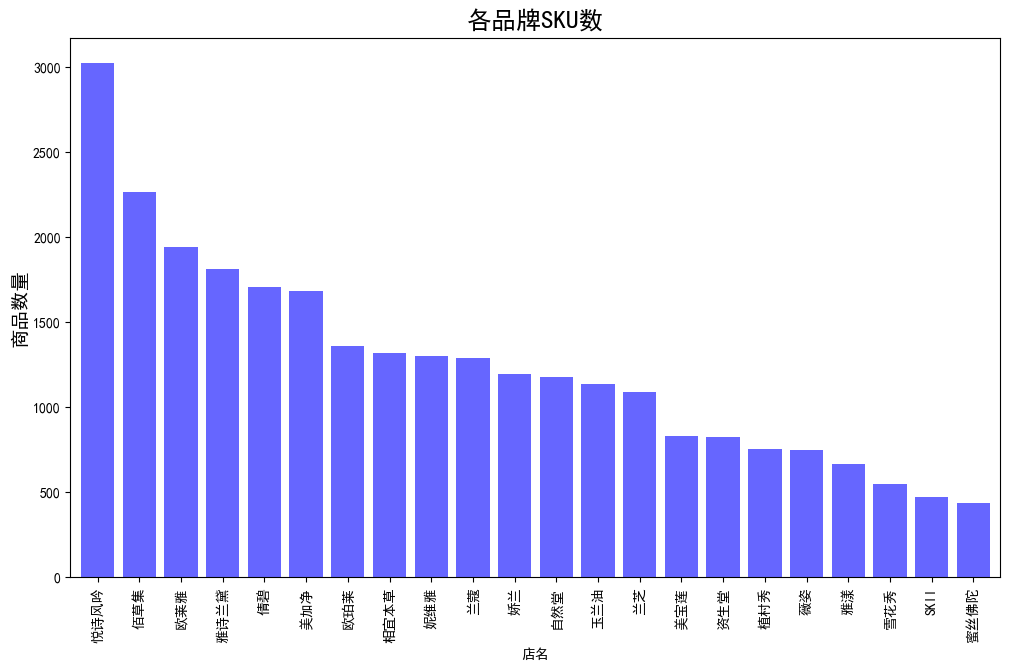

In [23]:
plt.rcParams['font.sans-serif']=['SimHei']  # 指定默认字体 
plt.rcParams['axes.unicode_minus']=False  # 解决负号'-'显示为方块的问题

plt.figure(figsize=(12,7))   # 指定画布大小为宽12英寸，高7英寸

# 传入各个品牌的商品数量
cleaned_data['店名'].value_counts().sort_values(ascending=False).plot.bar(width=0.8,alpha=0.6,color='b')

plt.title('各品牌SKU数',fontsize=18)    #标题
plt.ylabel('商品数量',fontsize=14)      #y轴标签
plt.show()

显而易见，`悦诗风吟`的商品数量最多，`蜜丝佛陀`的商品数量最少

### 4.2 品牌总销售和总销售额

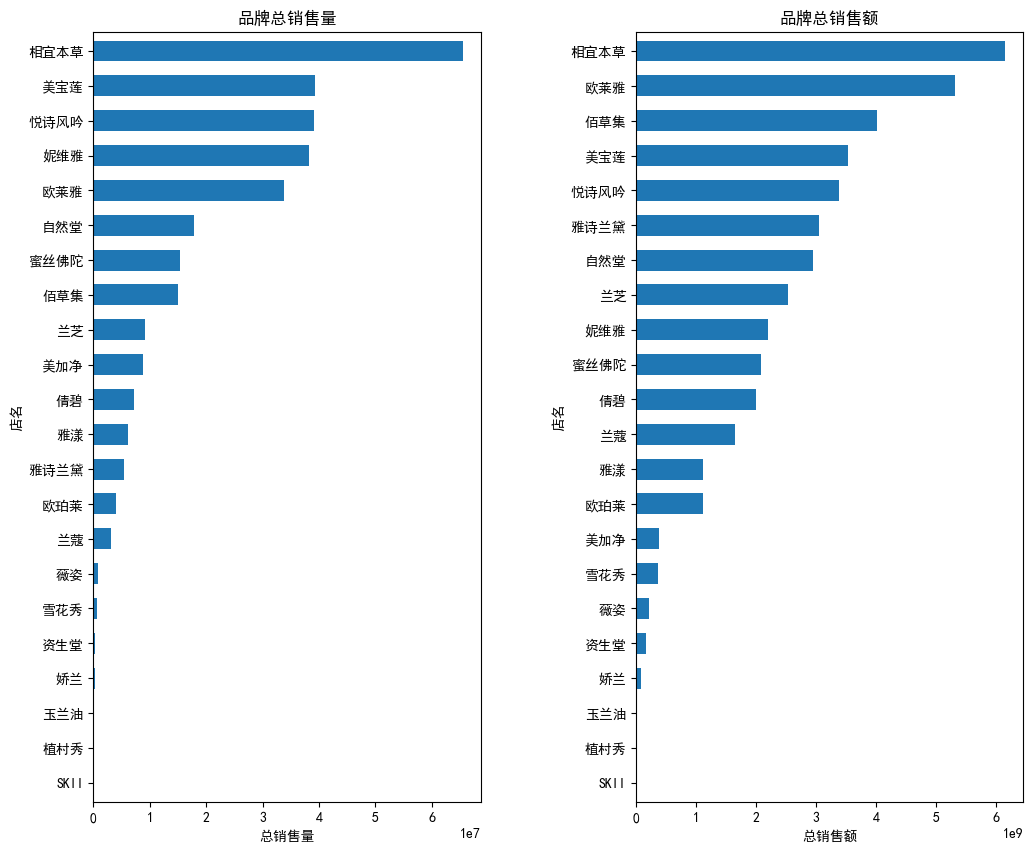

In [24]:
fig,axes = plt.subplots(1,2,figsize=(12,10))    # 创建1行2列的子图布局，整个图形大小为宽12英寸、高10英寸

# 按店名分组，统计每个分组的销售量，降序排列，绘制水平条形图
ax1 = cleaned_data.groupby('店名').sale_count.sum().sort_values(ascending=True).plot(kind='barh',ax=axes[0],width=0.6)
ax1.set_title('品牌总销售量',fontsize=12)
ax1.set_xlabel('总销售量')

# 按店名分组，统计每个分组的销售额，降序排列，绘制水平条形图
ax2 = cleaned_data.groupby('店名')['销售额'].sum().sort_values(ascending=True).plot(kind='barh',ax=axes[1],width=0.6)
ax2.set_title('品牌总销售额',fontsize=12)
ax2.set_xlabel('总销售额')

plt.subplots_adjust(wspace=0.4)
plt.show()

`相宜本草`的销售量和销售额都是最高的。销量第二至第五，分别为`美宝莲`、`悦诗风吟`、`妮维雅`、`欧莱雅`；销售额第二至第五，分别为`欧莱雅`、`佰草集`、`美宝莲`、`悦诗风吟`。 

值得注意的是，`相宜本草`、`美宝莲`、`悦诗风吟`、`欧莱雅`都在销量、销售额前五中。

### 4.3 各类别的销售量、销售额情况

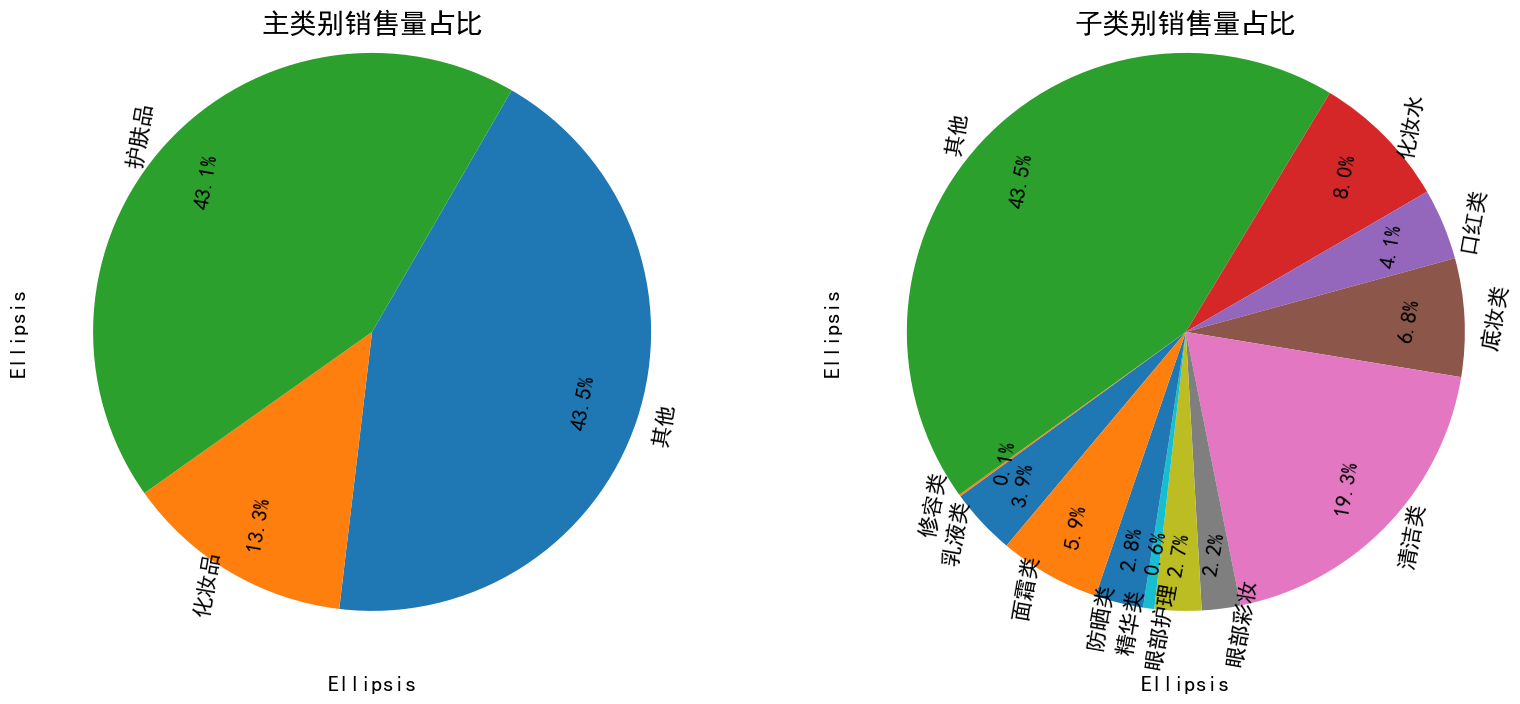

In [25]:
fig,axes = plt.subplots(1,2,figsize=(18,12))  #一行两个子图，宽18英寸，高12英寸

data1 = cleaned_data.groupby('main_type')['sale_count'].sum() # 以main_type作为分组，求每个分组销售量
ax1 = data1.plot(kind='pie',ax=axes[0],autopct='%.1f%%', # 选择第一个子图，设置百分比的格式，这里保留一位小数
pctdistance=0.8, # 设置百分比标签与圆心的距离
labels= data1.index,
labeldistance = 1.05, # 设置标签与圆心的距离
startangle = 60, # 设置饼图的初始角度
radius = 1.2, # 设置饼图的半径
counterclock = False, # 是否逆时针，这里设置为顺时针方向
wedgeprops = {'linewidth': 1.2, },# 设置饼图内外边界的属性值
textprops = {'fontsize':16, 'color':'k','rotation':80}, # 设置文本标签的属性值
)
ax1.set_title('主类别销售量占比',fontsize=20)

data2 = cleaned_data.groupby('sub_type')['sale_count'].sum() # 以sub_type作为分组，求每个分组销售量
ax2 = data2.plot(kind='pie',ax=axes[1],autopct='%.1f%%', # 选择第二个子图，设置百分比的格式，这里保留一位小数
pctdistance=0.8, 
labels= data2.index,
labeldistance = 1.05,
startangle = 230, 
radius = 1.2, 
counterclock = False, 
wedgeprops = {'linewidth': 1.2, },
textprops = {'fontsize':16, 'color':'k','rotation':80}, 
)

ax2.set_title('子类别销售量占比',fontsize=20)

# 设置坐标标签
ax1.set_xlabel(..., fontsize=16,labelpad=38.5)
ax1.set_ylabel(..., fontsize=16,labelpad=38.5)
ax2.set_xlabel(..., fontsize=16,labelpad=38.5)
ax2.set_ylabel(..., fontsize=16,labelpad=38.5)
plt.subplots_adjust(wspace=0.4)
plt.show()

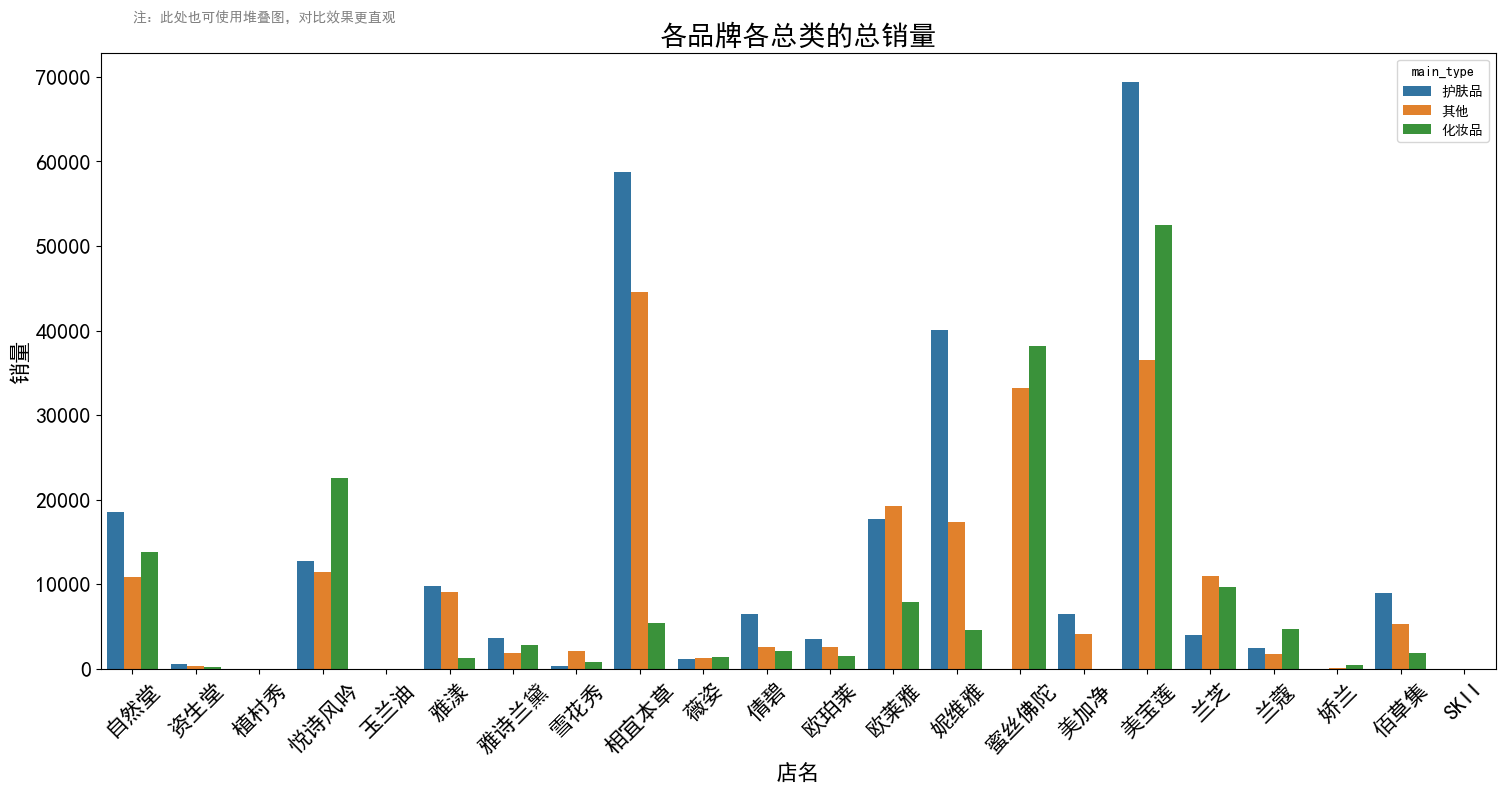

In [26]:
plt.figure(figsize=(18,8))   #宽18英寸，高8英寸 
sns.barplot(x='店名',y='sale_count',hue='main_type',data=cleaned_data,saturation=0.75,errorbar=('ci', 0))
plt.title('各品牌各总类的总销量', fontsize=20)
plt.ylabel('销量',fontsize=16)
plt.xlabel('店名',fontsize=16)
plt.text(0,78000,'注：此处也可使用堆叠图，对比效果更直观',
         verticalalignment='top', horizontalalignment='left',color='gray', fontsize=10) # 设置注释的样式，注释放在（0，78000）坐标处

plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16)
plt.show()

各品牌的化妆品、护肤品销量、销售情况均不一样，这与品牌的定位有关， 有的品牌主打化妆品，化妆品会表现好很多，如蜜丝佛陀等。主打护肤品的品牌，护肤品的销量销售额会表现好很多，如欧莱雅、佰草集等。 有的品牌如美宝莲、兰蔻、悦诗风吟，化妆品和护肤品的销售、销售额都还不错。

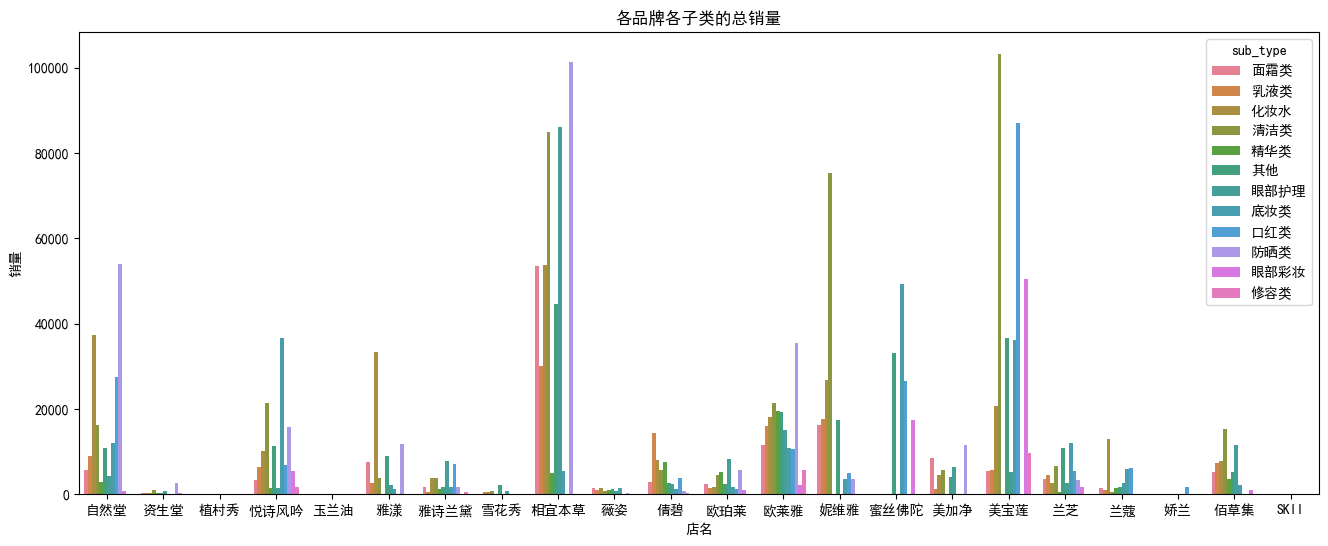

In [27]:
plt.figure(figsize = (16,6))
sns.barplot( x = '店名',
y = 'sale_count',hue = 'sub_type',data =cleaned_data,saturation = 0.75,errorbar=('ci', 0))
plt.title('各品牌各子类的总销量')
plt.ylabel('销量')
plt.show()

从结果可知，相宜本草的清洁类、眼部护理、防晒类的销量很出色，妮维雅的清洁类很出色，美宝莲的清洁类、口红类很出色

### 4.4 各品牌热度

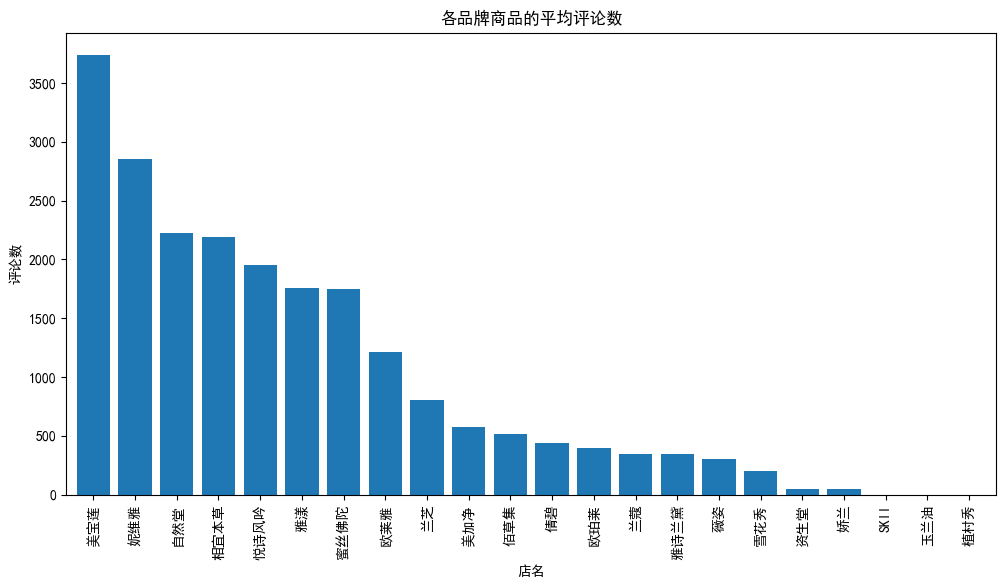

In [28]:
plt.figure(figsize = (12,6))
cleaned_data.groupby('店名').comment_count.mean().sort_values(ascending=False).plot(kind='bar',width=0.8)
plt.title('各品牌商品的平均评论数')
plt.ylabel('评论数')
plt.show()

显而易见，美宝莲的平均评论数最高，妮维雅次之。第一和第二出现断层式差距，相差近1000

In [29]:
cleaned_data

,id,title,price,sale_count,comment_count,店名,sub_type,main_type,是否男士专用,销售额,day
update_time,,,,,,,,,,,
2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,面霜类,护肤品,否,3713941.0,14
2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,乳液类,护肤品,否,1575668.0,14
2016-11-14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,化妆水,护肤品,否,1254132.0,14
2016-11-14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,清洁类,护肤品,是,980590.0,14
2016-11-14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,面霜类,护肤品,否,722244.0,14
...,...,...,...,...,...,...,...,...,...,...,...
2016-11-05,A535642405757,SK-II【11-11】全新大眼眼霜skii放大双眼眼部修护精华紧致,590.0,0.0,0.0,SKII,眼部护理,护肤品,否,0.0,5
2016-11-05,A535911851408,SK-II 11-11预售skii大眼眼霜sk2眼部修护精华霜淡化黑眼圈,590.0,0.0,0.0,SKII,眼部护理,护肤品,否,0.0,5
2016-11-05,A537027211850,SK-II 11-11预售skii前男友护肤面膜sk2精华面膜贴密集修护,1740.0,0.0,0.0,SKII,其他,其他,否,0.0,5


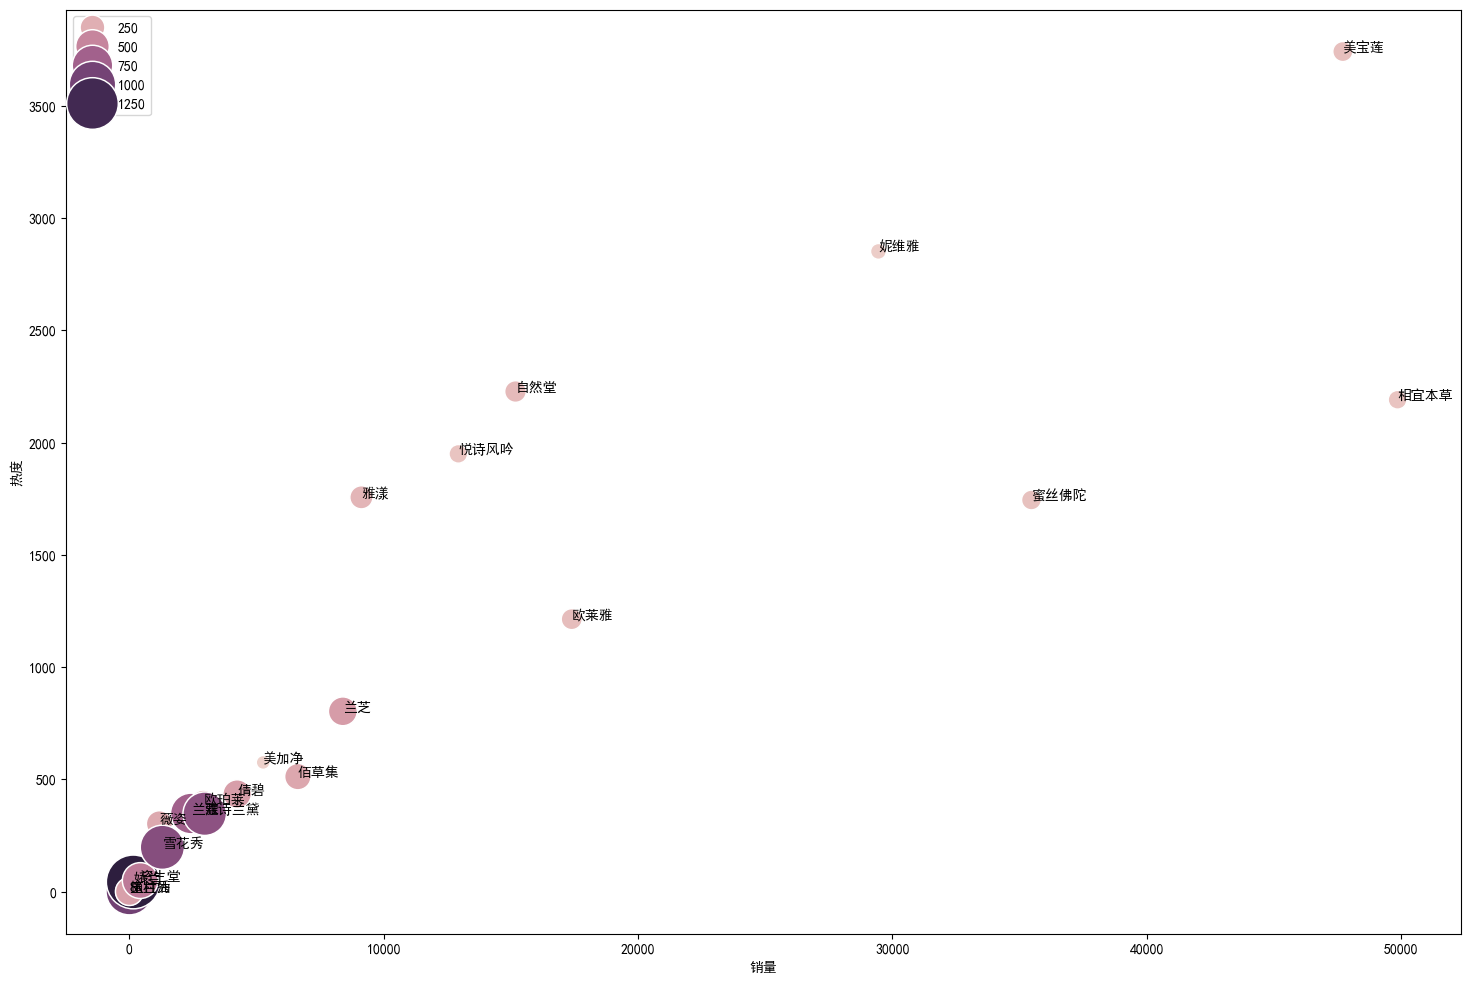

In [30]:
plt.figure(figsize=(18,12))  # 宽18英寸，高12英寸

x = cleaned_data.groupby('店名')['sale_count'].mean()
y = cleaned_data.groupby('店名')['comment_count'].mean()
s = cleaned_data.groupby('店名')['price'].mean()
txt = cleaned_data.groupby('店名').id.count().index

# x轴由平均销量决定，y轴由平均评论量决定，点大小由平均价格决定，色调深浅也由平均价格决定。
sns.scatterplot(x=x,y=y,size=s,hue=s,sizes=(100,1500),data=cleaned_data) 

for i in range(len(txt)):
    plt.annotate(txt[i],xy=(x.iloc[i],y.iloc[i]))  #为每一个点加上文本标签，内容是品牌名称，xy参数是该点坐标
    
plt.ylabel('热度')
plt.xlabel('销量')

plt.legend(loc='upper left')
plt.show()

由上图所示：

越靠上的品牌热度越高，越靠右的品牌销量越高，颜色越深圈越大价格越高

热度与销量呈现一定的正相关；
美宝莲热度第一，销量第二，妮维雅热度第二，销量第四，两者价格均相对较低；
价格低的品牌热度和销量相对较高，价格高的品牌热度和销量相对较低，说明价格在热度和销量中有一定影响；

### 4.5 各品牌价格

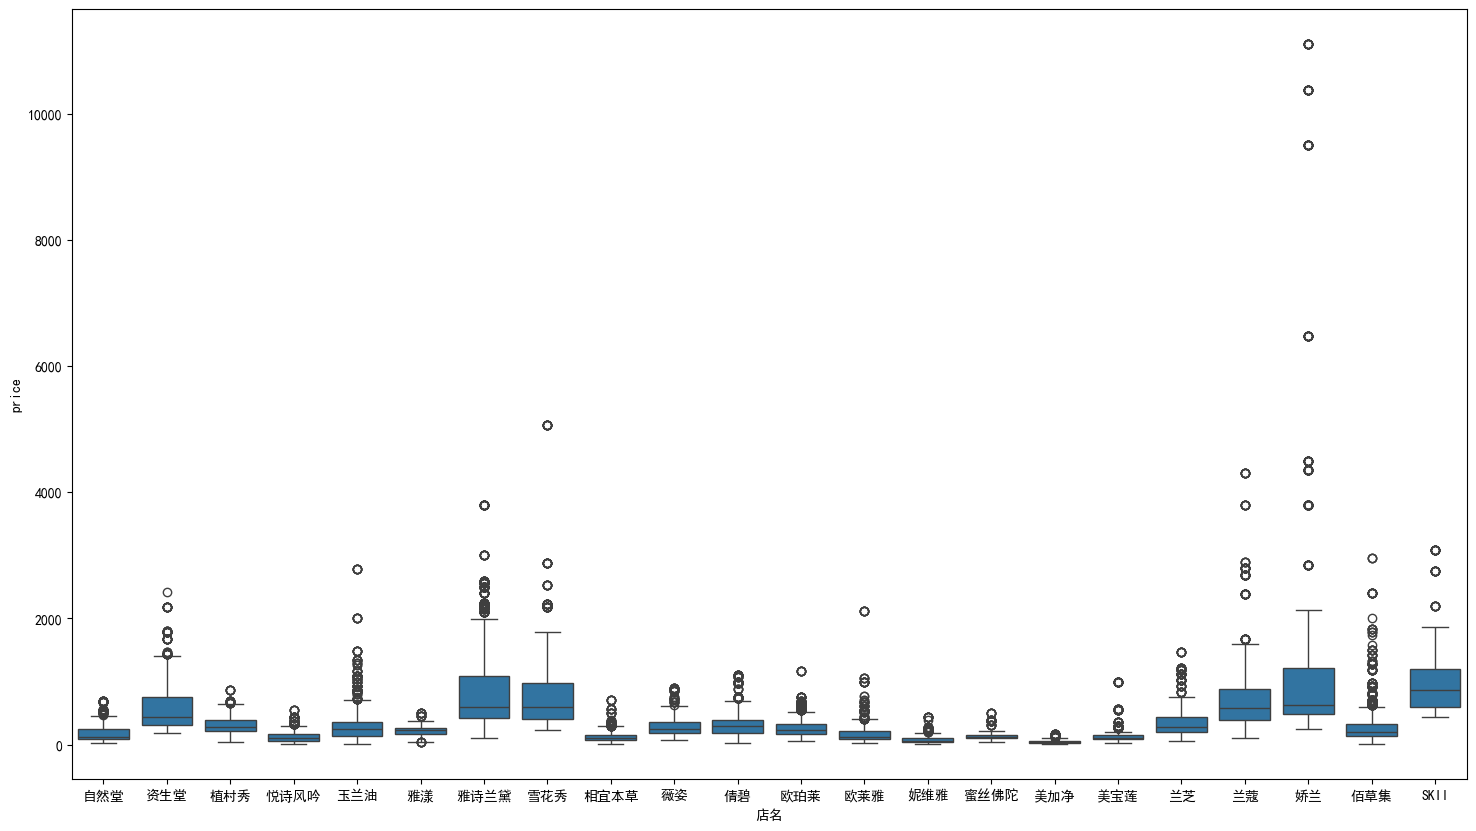

In [31]:
#查看价格的箱型图
plt.figure(figsize=(18,10))
sns.boxplot(x='店名',y='price',data=cleaned_data)
# plt.ylim(0,3000)#把Y轴刻度缩小为0-3000，否则不容易看清箱形
plt.show()

价格维度来看，娇兰的价格极高，美加净的价格极低，这可能与他们采取的市场策略有关，一个主打高端市场，一个主打性价比

In [38]:
avg_price=cleaned_data.groupby('店名').price.sum()/cleaned_data.groupby('店名').price.count()# 每个店的销售额/店数量
avg_price

店名
SKII    1011.727079
佰草集      289.823171
倩碧       346.092190
兰芝       356.615809
兰蔻       756.400778
妮维雅       73.789053
娇兰      1361.043588
悦诗风吟     121.245945
植村秀      311.786667
欧珀莱      276.218543
欧莱雅      167.282698
玉兰油      329.657294
相宜本草     122.958446
美加净       44.694619
美宝莲      148.757576
自然堂      180.130213
薇姿       281.085791
蜜丝佛陀     142.118894
资生堂      577.438490
雅漾       212.618401
雅诗兰黛     872.470718
雪花秀      901.082873
Name: price, dtype: float64

从数据可知，娇兰的平均店铺销售额最高，从上一个价格分布图也可在，娇兰卖的较贵。美加净则卖的最便宜

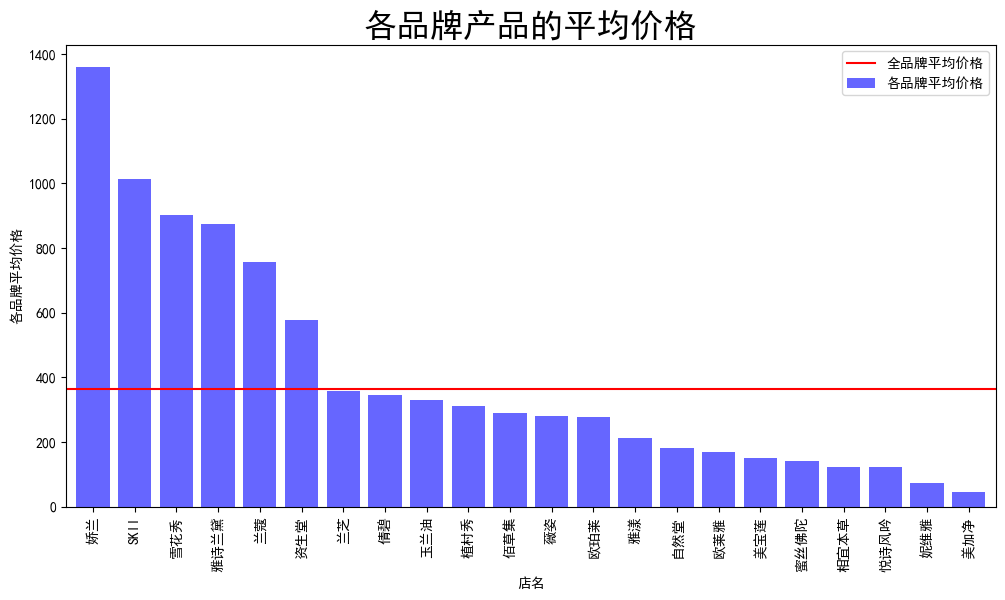

In [33]:
fig = plt.figure(figsize=(12,6))
avg_price.sort_values(ascending=False).plot(kind='bar',width=0.8,alpha=0.6,color='b',label='各品牌平均价格')
y = cleaned_data['price'].mean()
plt.axhline(y,0,5,color='r',label='全品牌平均价格')
plt.ylabel('各品牌平均价格')
plt.title('各品牌产品的平均价格',fontsize=24)
plt.legend(loc='best')
plt.show()

娇兰、SKII、雪花秀、雅诗兰黛、兰蔻、资生堂这几个国际大牌的产品价格很高，产品平均价格都在500以上，都是一线大牌；

兰芝、倩碧、玉兰油、植村秀、佰草集、薇姿、雅漾的平均价格在300-400元左右，其中佰草集是最贵的国货品牌；

美加净作为国货品牌，性价比高，平均价格最低，妮维雅的平均价格第二低，在100元左右；

全品牌平均价格低于400元，除了前五个国际大牌其余品牌的平均价格都低于全品牌平均价格；


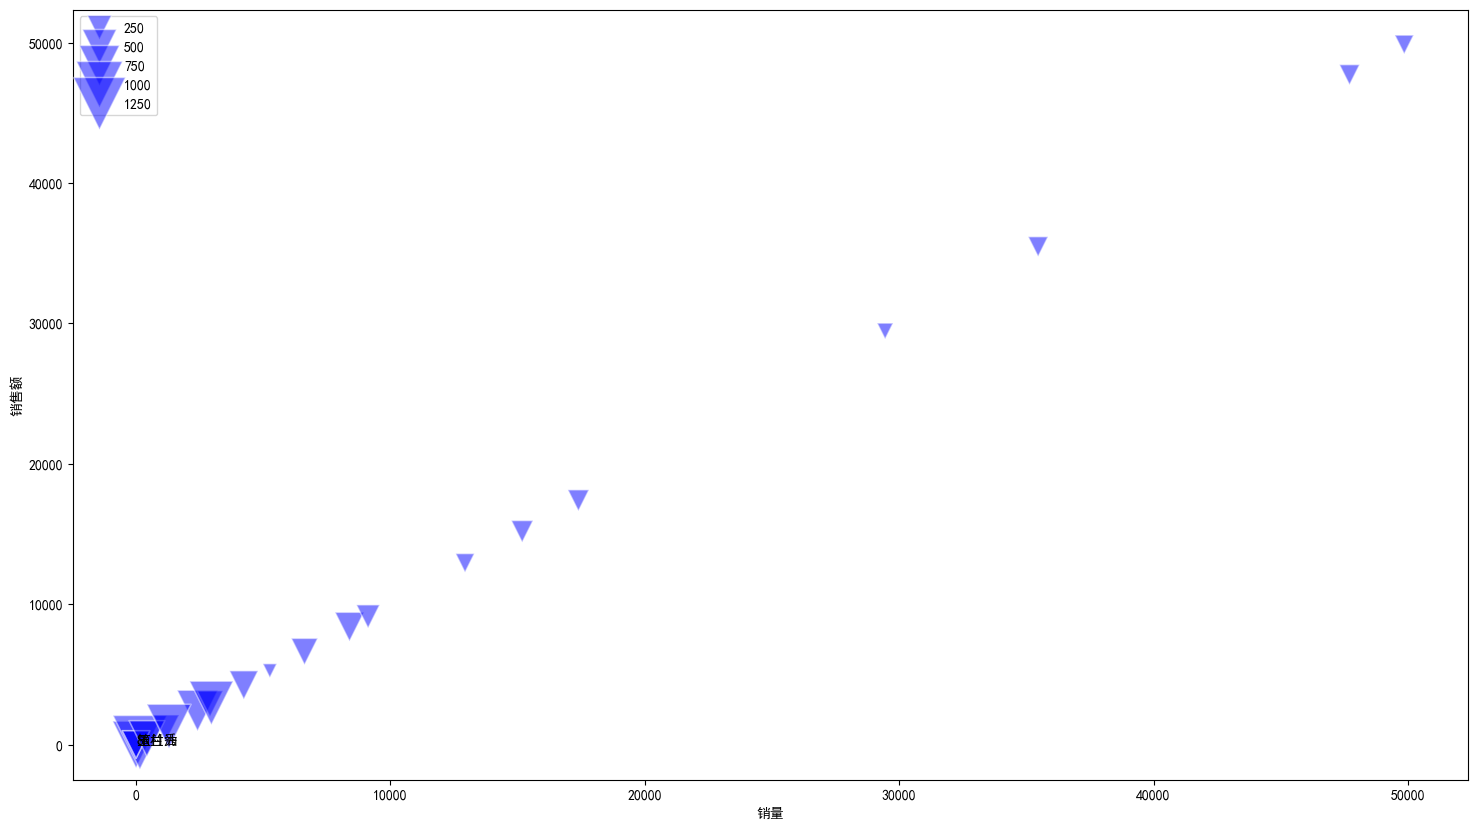

In [34]:
plt.figure(figsize=(18,10))

x = cleaned_data.groupby('店名')['sale_count'].mean()
y = cleaned_data.groupby('店名')['销售额'].mean()
s = avg_price
txt = cleaned_data.groupby('店名').id.count().index

sns.scatterplot(x=x,y=x,size=s,sizes=(100,1500),marker='v',alpha=0.5,color='b',data=cleaned_data)# x轴表示平均销量，y轴表示平均销售额，大小用平均价格表示

for i in range(len(txt)):
    plt.annotate(txt[i],xy=(x.iloc[i],y.iloc[i]),xytext = (x.iloc[i]+0.2, y.iloc[i]+0.2))  #在散点后面增加品牌信息的标签
    
plt.ylabel('销售额')
plt.xlabel('销量')

plt.legend(loc='upper left')
plt.show()

由上图所示，越靠上代表销售额越高，越靠左代表销量越高，图形越大代表平均价格越高

销售量和销售额呈现正相关；

相宜本草、美宝莲、蜜丝佛陀销量和销售额位居前三，且平均价格居中；

说明销量销售额与价格有很重要的联系；

### 4.6 男性护肤品销量情况

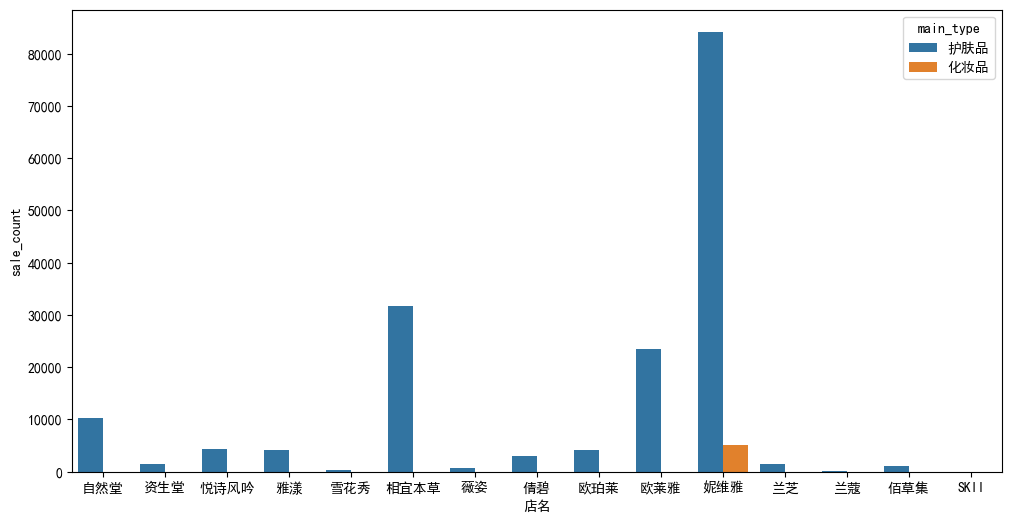

In [35]:
gender_data=cleaned_data[cleaned_data['是否男士专用']=='是']
gender_data_1=gender_data[(gender_data.main_type =='护肤品')| (gender_data.main_type=='化妆品')]
plt.figure(figsize = (12,6))
sns.barplot(x='店名',y='sale_count',hue='main_type',data =gender_data_1,saturation=0.75,errorbar=('ci', 0),)
plt.show()

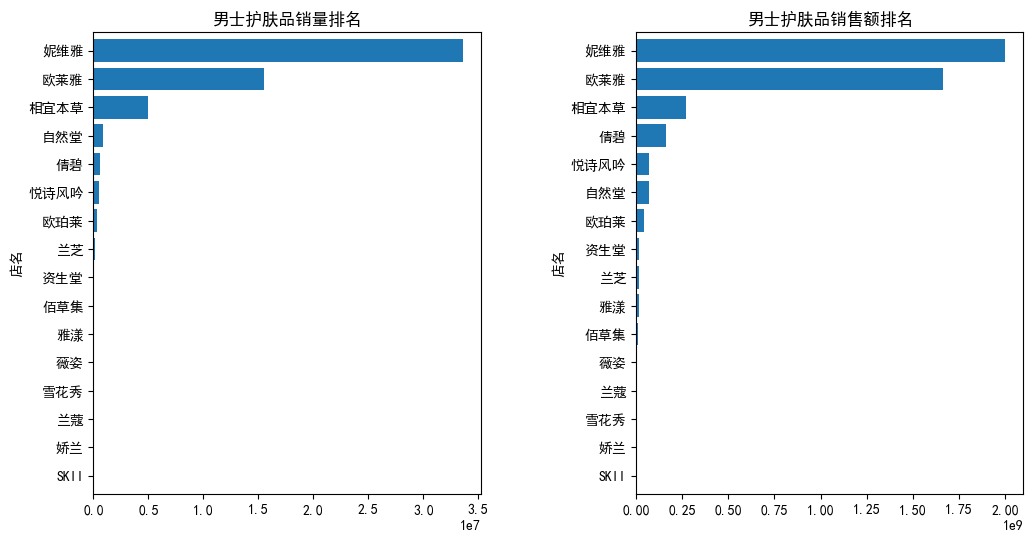

In [36]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
gender_data.groupby('店名').sale_count.sum().sort_values(ascending=True).plot(kind='barh',width=0.8,ax=ax1)
ax1.set_title('男士护肤品销量排名')

gender_data.groupby('店名').销售额.sum().sort_values(ascending=True).plot(kind='barh',width=0.8,ax=ax2)
ax2.set_title('男士护肤品销售额排名')

plt.subplots_adjust(wspace=0.4)
plt.show()

男士购买的大多是护肤品；

妮维雅是男生护肤品中销量遥遥领先的品牌，第二第三分别为欧莱雅、相宜本草；

### 4.7 分析时间与销量的关系，体现购买高峰期

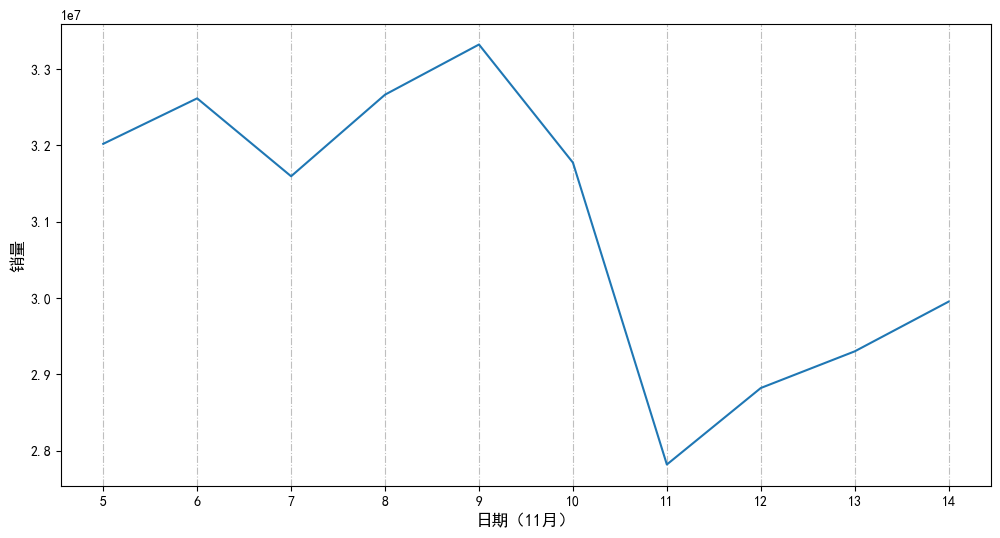

In [37]:
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize = (12,6))
day_sale=cleaned_data.groupby('day')['sale_count'].sum()
day_sale.plot()
plt.grid(linestyle="-.",color="gray",axis="x",alpha=0.5)
x_major_locator=MultipleLocator(1)  #把x轴的刻度间隔设置为1，并存在变量里
ax=plt.gca()  #ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
plt.xlabel('日期（11月）',fontsize=12)
plt.ylabel('销量',fontsize=12)
plt.show()

如上图所示：

6号与9号是两个购买高峰期，11号是购买低谷期。

## 五、总结

美妆类别中护肤品销量远大于化妆品，其中清洁类、化妆水、面霜等基础护肤类销量最高；

男士购买美妆集中在护肤品类，其中妮维雅品牌是最受男士喜爱的品牌；

价格和热度对销售量有关联，平价基础产品是大多数消费者的选择；

由于商家在双十一提前预热，巨大的优惠力度和为了避免网络高峰，不少消费者选择提前消费，销量高峰出现在双十一前几天；双十一后3天商家持续打折优惠，消费者还保有购物余热，但远不如双十一之前。

## 六、建议

消费者对产品价格和热度关注度较高，品牌可以适当调整产品价格并通过诸如网络社交平台的方式提高品牌热度；

对于男性消费者，品牌可以定向推荐平价基础护肤产品，在销量中可以看到也有一部分男性购买化妆品，品牌可以在护肤品中适当捆绑化妆品产品带动消费；

消费者购买欲望并不集中在双十一当天，商家可以提前预热加大优惠力度刺激消费者提前消费，避免网络高峰。